# DSC 540 

### Week 7 - 8:  Activity 9, Activity 10, Connect with Twitter API, and Graph Exercise

**Author: Kimberly Cable<br>
Date: 7-30-2022**

## 1. Data Wrangling with Python: Activity 9, page 294

### What is Project Gutenberg? - 

Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the **oldest digital library.** This longest-established ebook project releases books that entered the public domain, and can be freely read or downloaded in various electronic formats.

### What is this activity all about?

* **This activity aims to scrape the url of the Project Gutenberg's Top 100 ebooks (yesterday's ranking) for identifying the ebook links.**
* **It uses BeautifulSoup4 for parsing the HTML and regular expression code for identifying the Top 100 ebook file numbers.**
* **You can use those book ID numbers to download the book into your local drive if you want**

#### 1. Import necessary libraries including regex, and beautifulsoup

In [1]:
# import librarys
from bs4 import BeautifulSoup
import requests
import pandas as pd
import ssl
import re

#### 2. Check the SSL certificate

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

#### 3. Read the HTML from the URL

#### 4. Write a small function to check the status of web request

#### 5. Decode the response and pass on to `BeautifulSoup` for HTML parsing

In [3]:
response = requests.get(
   url="https://www.gutenberg.org/browse/scores/top",
    )

if response.status_code == requests.codes.ok:       
    soup_content = BeautifulSoup(response.content, 'html.parser')
else:
    print("Sorry, something went wrong")

#### 6. Find all the _href_ tags and store them in the list of links. Check how the list looks like - print first 30 elements

In [4]:
href_tags = []

for tag in soup_content.find_all("a"):
    href_split = tag.get('href').split('/')
    
    if len(href_split) > 2: 
        if href_split[1] == 'ebooks':
            href_tags.append(tag.get('href'))
    
href_tags[:30]

['/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/ebooks/offline_catalogs.html',
 '/ebooks/1342',
 '/ebooks/1661',
 '/ebooks/4300',
 '/ebooks/11',
 '/ebooks/2701',
 '/ebooks/105',
 '/ebooks/345',
 '/ebooks/84',
 '/ebooks/98',
 '/ebooks/174',
 '/ebooks/1184',
 '/ebooks/4980',
 '/ebooks/68629',
 '/ebooks/2591',
 '/ebooks/6130',
 '/ebooks/68628',
 '/ebooks/68630',
 '/ebooks/2600',
 '/ebooks/1952',
 '/ebooks/2554',
 '/ebooks/1400',
 '/ebooks/74',
 '/ebooks/76',
 '/ebooks/33283',
 '/ebooks/30254',
 '/ebooks/64317']

#### 7. Use regular expression to find the numeric digits in these links. These are the file number for the Top 100 books.

#### 8. Initialize empty list to hold the file numbers over an appropriate range and use **regex** to find the numeric digits in the link **href** string. Use the **findall** method.

In [5]:
book_numbers = []

for url in href_tags:
    book = re.findall(r'[0-9]+', url)
    
    if len(book) > 0:
        book_numbers.append(int(book[0]))
            
book_numbers[:30]

[1342,
 1661,
 4300,
 11,
 2701,
 105,
 345,
 84,
 98,
 174,
 1184,
 4980,
 68629,
 2591,
 6130,
 68628,
 68630,
 2600,
 1952,
 2554,
 1400,
 74,
 76,
 33283,
 30254,
 64317,
 1260,
 68638,
 5200,
 46]

#### 9. What does the **soup** object's text look like? Use **.text** method and print only first 2,000 characters (i.e. do not print the whole thing, it is long).

In [6]:
soup_content.text[:2000]

"\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright Procedures\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not co

#### 10. Search in the extracted text (using regular expression) from the soup object to find the names of top 100 ebooks (yesterday's rank)

#### 11. Create a starting index. It should point at the text *Top 100 Ebooks yesterday*. Use **splitlines** method of the soup.text. It splits the lines of the text of the soup object.

In [7]:
idx1 = soup_content.text.splitlines().index('Top 100 EBooks yesterday') + 10
idx1

123

#### 12. Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: use the **splitlines** method

In [8]:
temp_list = []

for i in range(100):
    temp_list.append(soup_content.text.splitlines()[idx1 + i])
    
temp_list

['Pride and Prejudice by Jane Austen (1678)',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (858)',
 'Ulysses by James Joyce (800)',
 "Alice's Adventures in Wonderland by Lewis Carroll (686)",
 'Moby Dick; Or, The Whale by Herman Melville (557)',
 'Persuasion by Jane Austen (540)',
 'Dracula by Bram Stoker (509)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (505)',
 'A Tale of Two Cities by Charles Dickens (503)',
 'The Picture of Dorian Gray by Oscar Wilde (465)',
 'The Count of Monte Cristo, Illustrated by Alexandre Dumas (454)',
 'Old Granny Fox by Thornton W.  Burgess (404)',
 'The Crowded Street by Winifred Holtby (388)',
 "Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm (382)",
 'The Iliad by Homer (373)',
 'The skeleton key by Bernard Edward Joseph Capes (345)',
 'The lively adventures of Gavin Hamilton by Molly Elliot Seawell (345)',
 'War and Peace by graf Leo Tolstoy (343)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (343)

#### 13. Use regular expression to extract only text from the name strings and append to an empty list. Use **match** and **span** to find indices and use them.

In [9]:
# this is the books way but it wont work with non english titles and regex wont work
# see below for my version
book_titles=[]

for i in range(100):
    start_idx, end_idx = re.match('^[a-zA-Z ]*',temp_list[i]).span()
    book_titles.append(temp_list[i][start_idx:end_idx])

In [10]:
book_titles

['Pride and Prejudice by Jane Austen ',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'Ulysses by James Joyce ',
 'Alice',
 'Moby Dick',
 'Persuasion by Jane Austen ',
 'Dracula by Bram Stoker ',
 'Frankenstein',
 'A Tale of Two Cities by Charles Dickens ',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'The Count of Monte Cristo',
 'Old Granny Fox by Thornton W',
 'The Crowded Street by Winifred Holtby ',
 'Grimms',
 'The Iliad by Homer ',
 'The skeleton key by Bernard Edward Joseph Capes ',
 'The lively adventures of Gavin Hamilton by Molly Elliot Seawell ',
 'War and Peace by graf Leo Tolstoy ',
 'The Yellow Wallpaper by Charlotte Perkins Gilman ',
 'Crime and Punishment by Fyodor Dostoyevsky ',
 'Great Expectations by Charles Dickens ',
 'The Adventures of Tom Sawyer',
 'Adventures of Huckleberry Finn by Mark Twain ',
 'Calculus Made Easy by Silvanus P',
 'The Romance of Lust',
 'The Great Gatsby by F',
 'Jane Eyre',
 'The Philistine',
 'Metamorphosis by Franz Kafk

In [11]:
# Kims version
book_titles_all = []

for i in range(100):
    title = temp_list[i].split("by")
    book_titles_all.append(title[0].strip())
    
book_titles_all

['Pride and Prejudice',
 'The Adventures of Sherlock Holmes',
 'Ulysses',
 "Alice's Adventures in Wonderland",
 'Mo',
 'Persuasion',
 'Dracula',
 'Frankenstein; Or, The Modern Prometheus',
 'A Tale of Two Cities',
 'The Picture of Dorian Gray',
 'The Count of Monte Cristo, Illustrated',
 'Old Granny Fox',
 'The Crowded Street',
 "Grimms' Fairy Tales",
 'The Iliad',
 'The skeleton key',
 'The lively adventures of Gavin Hamilton',
 'War and Peace',
 'The Yellow Wallpaper',
 'Crime and Punishment',
 'Great Expectations',
 'The Adventures of Tom Sawyer, Complete',
 'Adventures of Huckleberry Finn',
 'Calculus Made Easy',
 'The Romance of Lust: A classic Victorian erotic novel',
 'The Great Gats',
 'Jane Eyre: An Autobiography',
 'The Philistine: a periodical of protest (Vol. I, No. 6, November 1895)',
 'Metamorphosis',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas',
 'A Modest Proposal',
 'Anne of Green Gables',
 'Tractatus Logico-Philosophicus',
 'Japanese Girls and Women

## 2. Data Wrangling with Python: Activity 10, page 295

**This notebook does the following:**
* Retrieves and prints basic data about a movie (title entered by user) from the web (OMDB database)
* If a poster of the movie could be found, it downloads the file and saves at a user-specified location

In [12]:
# import libraries
import os
import sys
import requests
from configparser import ConfigParser
import pandas as pd
import json

In [13]:
# Get API Key from file
def get_api_key():
    '''
    Retrieve API_KEY
    
    args:
        none
        
    returns:
        API_KEY (str): api key for OMDB API
    '''
    config = ConfigParser()
    config.read(os.path.join(sys.path[0], "secrets.ini"))

    API_KEY = config["OMDB"]["API_KEY"]
    
    return API_KEY

In [14]:
def call_api(key, title):
    '''
    Call OMDB and get movie title information
    
    args:
        key (str): API key
        title (str): movie title
        
    returns:
        omdb_json (json): Information on movie title
    '''
    # Call API, exit out if exception raised
    
    # get parameters
    payload = {'t': title}
    
    # get api key
    OMDB_API_URL = 'http://www.omdbapi.com/?apikey=' + key
    
    try:
        response = requests.request(
            "GET", OMDB_API_URL, params = payload,
        )
    except requests.exceptions.HTTPError:
        print("We can't seem to locate the OMDB API.")
        print("Please try again later")
        sys.exit()
    except requests.exceptions.RequestException:
        print("Seems the OMDB API is currently down.")
        print("Please try again later")
        sys.exit()

    # Load data into json and return weather data
    # otherwise print error and exit
    if response.status_code == requests.codes.ok:
        omdb_json = response.json()
        return omdb_json
    else:
        return {"Error": f"Sorry, we couldnt find your title! Please re-enter:  {response.status_code}"}

In [15]:
def print_json(json_data):
    '''
    Print json data
    
    args:
        json_data (json): OMDB movie data
        
    returns:
        none
    '''
    api_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    print("-" * 50)
    
    for k in api_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    
    print("-" * 50)

In [16]:
def save_poster(json_data):
    '''
    Save poster image to local drive
    
    args:
        json_data (json): OMDB movie data
        
    returns:
        none    
    '''
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
       
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")

In [17]:
def search_movie(title):
    api_key = get_api_key()
    
    movie_data = call_api(api_key, title)
    if 'Error' in movie_data:
        print(f"Sorry, {title} was not found")
    else:  
        save_poster(movie_data)

In [18]:
# Search for the movie Titanic
search_movie('Titanic')

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,141,554
imdbID: tt0120338


In [19]:
# Search for an error movie
search_movie('Error movie')

Sorry, Error movie was not found


## 3. Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can 
take several days to get through, so don’t wait until the last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

    i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)

    ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

In [20]:
# import libraries
import tweepy as tw
import configparser

pd.set_option('display.max_colwidth', None) 

In [21]:
# Get credentials
config = configparser.RawConfigParser()
config.read(os.path.join(sys.path[0], "secrets.ini"))

API_KEY = config["TWITTER"]["API_KEY"]
API_KEY_SECRET = config["TWITTER"]["API_KEY_SECRET"]
BEARER_TOKEN = config["TWITTER"]["BEARER_TOKEN"]

In [22]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {BEARER_TOKEN}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

In [23]:
def connect_to_endpoint(url, params):
    '''
    Call URL and send back json
    
    args:
        url(str)
        params (str)
    '''
    response = requests.get(url, auth = bearer_oauth, params = params)
    
    print(f"Status Response Code: {response.status_code}")
    
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    
    return response.json()

In [24]:
def get_tweets(subject):
    '''
    Get tweets from twitter
    
    args:
        subject (str)
        
    return:
        tweets_df (dict)
    '''
    query_params = {'query': subject}
    search_url = "https://api.twitter.com/2/tweets/search/recent"

    json_response = connect_to_endpoint(search_url, query_params)
    
    tweets_df = pd.json_normalize(json_response['data'])
    
    return tweets_df

In [25]:
# Retrieve tweets for Bellevue University
bellevue_tweets = get_tweets('Bellevue University')
bellevue_tweets

Status Response Code: 200


,id,text
0,1553380776510889984,"WAMWAY: Josiah Dotzler\n\n6’4 PG\nFrom the roots of Bellevue, NE.\nReceived an offer from University of Nebraska Omaha and Indiana State University. https://t.co/McTxYfxnQD"
1,1553367859983781888,"RT @MethodistHlth: 1,500 free backpacks are ready to go to their new home! MLH and BookNook have teamed up for the giveaway. It's THIS MORN…"
2,1553365103051001856,"1,500 free backpacks are ready to go to their new home! MLH and BookNook have teamed up for the giveaway. It's THIS MORNING (Sat, July 30) starting at 10a. Come to Shorb Tower at Methodist University Hospital (near Bellevue Blvd and Eastmoreland Ave). Can't wait to see you! https://t.co/uVkeVTpLci"
3,1553328248242806788,RT @BUBruins: Bellevue University recognized by NAIA as Five-Star Award Winner\nhttps://t.co/zhGzRVcUIL \n#NAIACoC https://t.co/2QpoxyPBu0
4,1553223851793756161,RT @BUBruins: Bellevue University recognized by NAIA as Five-Star Award Winner\nhttps://t.co/zhGzRVcUIL \n#NAIACoC https://t.co/2QpoxyPBu0
5,1553219702897401857,RT @BUBruins: Bellevue University recognized by NAIA as Five-Star Award Winner\nhttps://t.co/zhGzRVcUIL \n#NAIACoC https://t.co/2QpoxyPBu0
6,1553209007267004417,RT @BUBruins: Bellevue University recognized by NAIA as Five-Star Award Winner\nhttps://t.co/zhGzRVcUIL \n#NAIACoC https://t.co/2QpoxyPBu0
7,1553110768614350850,RT @BUBruins: Bellevue University recognized by NAIA as Five-Star Award Winner\nhttps://t.co/zhGzRVcUIL \n#NAIACoC https://t.co/2QpoxyPBu0
8,1553098218749173760,Bellevue University recognized by NAIA as Five-Star Award Winner\nhttps://t.co/zhGzRVcUIL \n#NAIACoC https://t.co/2QpoxyPBu0
9,1553036632365748225,"Now hiring for 161 job opportunities at Gonzaga University (@GonzagaU), Fusion (@CareersFusion), Bellevue College (@Jobs_atBC), and more."


In [26]:
# retrienve tweets about Data Science
data_science_tweets = get_tweets('Data Science')
data_science_tweets

Status Response Code: 200


,id,text
0,1553380913597206528,RT @DataScienceDojo: 💡 Different types of databases!\nCredit: Data Science Learn\n\n#Databases #DataScience #AI https://t.co/qClU88e3P8
1,1553380902360817674,Learn Data Science from DataCamp\nPay 59$ on an annual subscription \nEnroll from here: https://t.co/X8oGsikDbc\nWatch the review: Deep Learning with Python\nhttps://t.co/jJFEXKxjhn\n#DataAnalytics #Python3 #codinglife #DataScience #MachineLearning #RStats #100daysofcodechallenge
2,1553380897881092096,"@autistocrates Your commitment isnt to her in the west, once you’re with her, your commitment is to the state and you’ll “mess around and find out” once you’re in a court room like millions of other men, confirmed, documented, data, science."
3,1553380840981291011,Learn Data Science from DataCamp\nPay 59$ on an annual subscription \nEnroll from here: https://t.co/X8oGsikDbc\nWatch the review: Data Engineer with Python\nhttps://t.co/utjgwPAH5I\n#DataAnalytics #Python3 #codinglife #DataScience #MachineLearning #RStats #100daysofcodechallenge
4,1553380806122504193,"RT @foldercase_com: https://t.co/YLhO4KgfuT integrates project, data, and collaboration management.\n\nFor intuitive organization of your res…"
5,1553380776770580480,"RT @EthicalSkeptic: Once the data says something officials don't like, they will simply take that data down.\n\nIf you don't speak up, then d…"
6,1553380762656940033,RT @LisaSelinDavis: Thanks @bariweiss for allowing me to write about why so much of Europe is shifting the approach to treating kids with g…
7,1553380753777594369,https://t.co/FlLLMfGcIJ
8,1553380707543777282,RT @DataScienceDojo: 💡 Different types of databases!\nCredit: Data Science Learn\n\n#Databases #DataScience #AI https://t.co/qClU88e3P8
9,1553380696730779649,Learn Data Science from DataCamp\nPay 59$ on an annual subscription \nEnroll from here: https://t.co/X8oGsikDbc\nWatch the review: Data Analyst with Python\nhttps://t.co/FBHKCCrdV9\n#DataAnalytics #Python3 #codinglife #DataScience #MachineLearning #RStats #100daysofcodechallenge


## 4. Graphing

Using one of the datasets provided, or a dataset of your own, choose 3 of the following visualizations to complete. You are free to use Matplotlib, Seaborn or another package if you prefer.
* Line
* Scatter
* Bar
* Histogram
* Density Plot
* Pie Chart

In [27]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Open Sales Records csv
try:
    sales_df = pd.read_csv("sales_record.csv")
    sales_df.info()
except Exception:
    print("There was an error opening the Sales Records file")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          5000 non-null   object 
 1   Country         5000 non-null   object 
 2   Item Type       5000 non-null   object 
 3   Sales Channel   5000 non-null   object 
 4   Order Priority  5000 non-null   object 
 5   Order Date      5000 non-null   object 
 6   Order ID        5000 non-null   int64  
 7   Ship Date       5000 non-null   object 
 8   Units Sold      5000 non-null   int64  
 9   Unit Price      5000 non-null   float64
 10  Unit Cost       5000 non-null   float64
 11  Total Revenue   5000 non-null   float64
 12  Total Cost      5000 non-null   float64
 13  Total Profit    5000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


In [29]:
sales_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


### Histograms

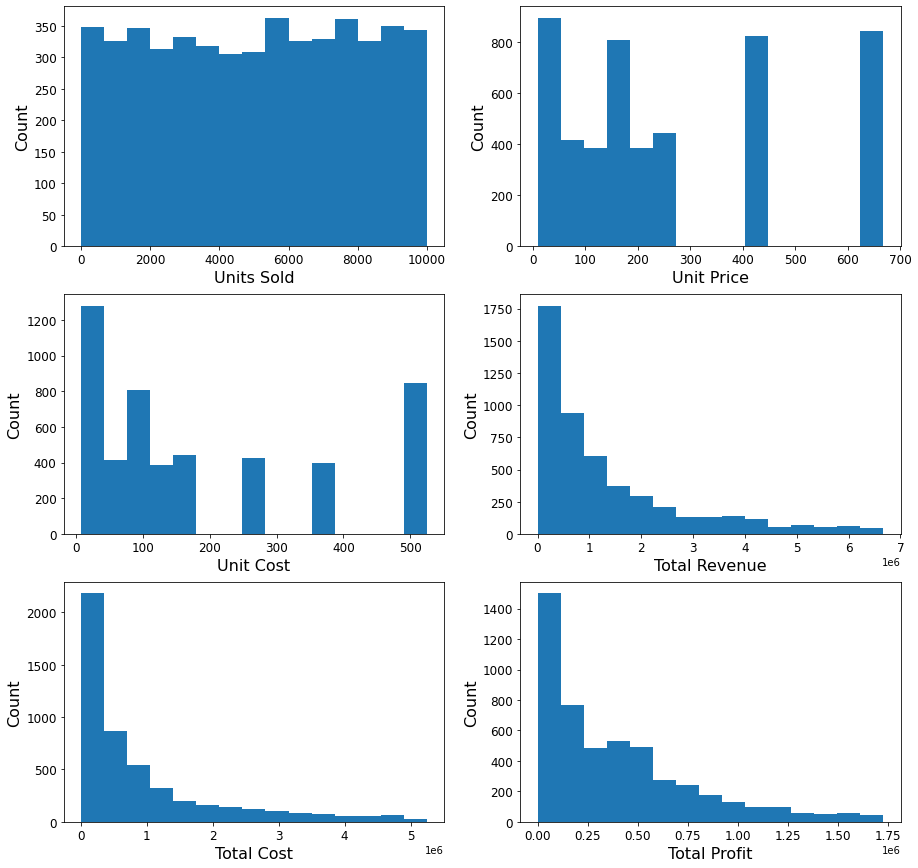

In [30]:
# Create histograms of numerical data

# Create figure
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(15, 15))

# Specify features interested in
num_features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
x_axes = num_features
y_axes = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count']

# Create histograms
axes = np.ravel(axes)

for idx, ax in enumerate(axes):
    ax.hist(sales_df[num_features[idx]].dropna(), bins = 15)
    ax.set_xlabel(x_axes[idx], fontsize = 16)
    ax.set_ylabel(y_axes[idx], fontsize = 16)
    ax.tick_params(axis = 'both', labelsize = 12)
    
plt.show()

### Scatter Plot

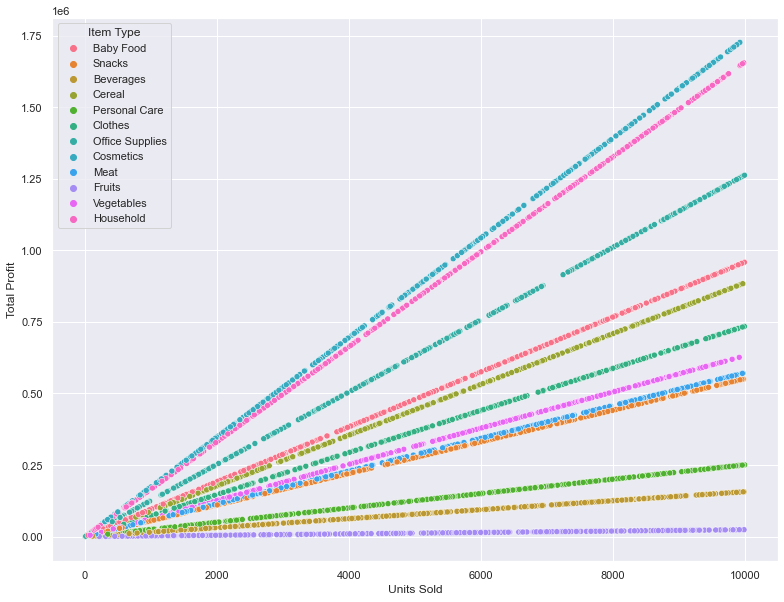

In [31]:
sns.set(rc={'figure.figsize':(13, 10)})
sns.scatterplot(x = 'Units Sold', y = 'Total Profit', data = sales_df, hue = 'Item Type')
plt.show()

### Pie Chart

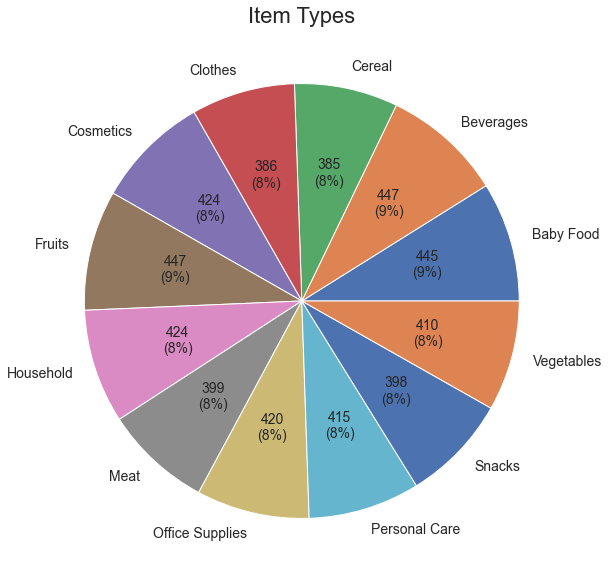

In [32]:
def label_function(val):
    return f'{val / 100 * len(sales_df):.0f}\n({val:.0f}%)'

fig, ax = plt.subplots(ncols = 1, figsize=(15, 10))

sales_df.groupby('Item Type').size().plot(kind = 'pie', autopct = label_function, textprops={'fontsize': 14}, ax = ax)
ax.set_ylabel('')
ax.set_title('Item Types', size=22)

plt.show()